# DETE and TAFE Exit Survey Project

I will be working with exit surveys from employees of the Department of Education, Training, and Employment (DETE) and Technical and Further Education (TAFE) institute in Queensland, Australia. 

I intend to answer the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The surveys have different formats, so I will do some cleaning in order to merge them and answer these questions.

Let's start by reading the data sets in.

## Data exploration

In [1]:
# load packages

import numpy as np

import pandas as pd

import matplotlib as plt


# import data sets

dete_survey = pd.read_csv('dete_survey.csv', 
                          na_values = 'Not Stated') # mark all 'Not Stated' 
                                                    # entries as missing

tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
# preview data sets

print(dete_survey.head(5))

print(tafe_survey.head(5))


# print dimensions of data

print(dete_survey.shape)

print(tafe_survey.shape)

   ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   Role Start Date                                      Position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

In [3]:
# print summary information

print(dete_survey.describe(include = 'all'))

print(tafe_survey.describe(include = 'all'))

                ID  SeparationType Cease Date  DETE Start Date  \
count   822.000000             822        788       749.000000   
unique         NaN               9         24              NaN   
top            NaN  Age Retirement       2012              NaN   
freq           NaN             285        344              NaN   
mean    411.693431             NaN        NaN      1994.182911   
std     237.705820             NaN        NaN        13.880503   
min       1.000000             NaN        NaN      1963.000000   
25%     206.250000             NaN        NaN      1982.000000   
50%     411.500000             NaN        NaN      1996.000000   
75%     616.750000             NaN        NaN      2007.000000   
max     823.000000             NaN        NaN      2013.000000   

        Role Start Date Position Classification        Region  \
count        724.000000      817            455           717   
unique              NaN       15              8             8   
top         

In [4]:
# print variable classes and number of non-null values

dete_survey.info()

tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

The DETE survey data consists of 822 rows and 56 columns, while the TAFE data consists of 702 rows and 72 columns.

## Handling missing values

Most of the DETE survey columns have a majoriy of non-missing values, the `Classification`, `Business Unit`, `Aboriginal` `Torres Strait`, `South Sea`, `Disability`, and `NESB` columns predominantly consist of null values.

For the TAFE survey data, there's a fair amount of missing values for *lots* of variables. Let's establish missing value counts for all variables in the next code chunk.

In [5]:
# number of missing values for each variable in each survey in descending order

print(dete_survey
          .isnull()
          .sum()
          .sort_values(ascending = False))

print(tafe_survey
          .isnull()
          .sum()
          .sort_values(ascending = False))

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Region                                 105
Role Start Date                         98
Opportunities for promotion             87
Career Aspirations                      76
DETE Start Date                         73
Wellness programs                       56
Coach                                   55
Further PD                              54
Cease Date                              34
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age        

Both data sets contain variables that are not needed for subsequent analyses. So, they can be dropped to clean up the output a bit.

In [6]:
# drop columns that are not needed

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

## Changing column names
In order to merge the data sets, the column names will have to be standardized. 

In [7]:
# inspect data set names

print(dete_survey_updated.columns)

print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

This next code chunk cleans up the variable names.

In [8]:
# modify DETE survey column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# rename TAFE survey variables
tafe_survey_updated = tafe_survey_updated.rename(columns = 
                                                 {'Record ID': 'id',
                                                     'CESSATION YEAR': 'cease_date',
                                                     'Reason for ceasing employment': 'separationtype',
                                                     'Gender. What is your Gender?': 'gender',
                                                     'CurrentAge. Current Age': 'age',
                                                     'Employment Type. Employment Type': 'employment_status',
                                                     'Classification. Classification': 'position',
                                                     'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                                                     'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
                                                )

In [9]:
# check out the current state of both data frames

print(dete_survey_updated.head(5))

print(tafe_survey_updated.head(5))

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   
3   4         Resignation-Other reasons    05/2012           2005.0   
4   5                    Age Retirement    05/2012           1970.0   

   role_start_date                                      position  \
0           2004.0                                Public Servant   
1              NaN                                Public Servant   
2           2011.0                               Schools Officer   
3           2006.0                                       Teacher   
4           1989.0  Head of Curriculum/Head of Special Education   

  classification              region                      business_unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-A

Now, there is some standardization of the variable names.

## Inspecting Resignations

In order to more adequately get at the question of why employees left their job, let's inspect value counts of the separation type variable in both data sets.

In [10]:
print(dete_survey_updated['separationtype'].value_counts())

print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


Now select only the data for survey respondents that have a `Resignation` separation type.

In [11]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')]

tafe_resignations = tafe_survey_updated.query('separationtype.str.contains("Resignation", na = False)',
                                              engine = "python")

Now, before I start cleaning and manipulating the rest of the data, I'll verify that the data do not contain any major inconsistencies (to the best of our knowledge). 

If there are many years higher than the current date or lower than 1940, I wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, I can remove them.

In [12]:
# check out number of unique values in the cease_date column

dete_resignations['cease_date'].value_counts()

dete_resignations.loc[:, 'cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].str.strip().astype('float').copy()

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
# now, all of the date data are in a standardized format

print(dete_resignations['cease_date'].value_counts().sort_index(ascending = True))

print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending = True))

print(tafe_resignations['cease_date'].value_counts().sort_index(ascending = True))

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


It appears that start dates for the DETE data go back as far as 1963 up to 2013. Resignation dates for the DETE and TAFE data range from 2006 to 2013. The years in each data set clearly don't span the same time window.

Recall that the question we are trying to answer is: Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer? 

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. 

In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [14]:
# create an institue_service variable that is calculated by subtracting the date of termination from the start date

dete_resignations.loc[:, 'institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


Now, let's create a new variable that designates whether or not employees quit their job due to any sort of dissatisfaction.

First, we will inspect the `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` variables in the TAFE suvey data. These variables will need to be recoded to boolean format.

The `job_dissatisfaction`, `dissatisfaction_with_the_department`, `physical_work_environment`, `lack_of_recognition`, `lack_of_job_security`, `work_location`, `employment_conditions`, `work_life_balance`, and `workload` variables in the DETE data set will also be inspected. These are boolean, so no need to recode.

If any of these variables are endorsed as `True`, a new `dissatisfied` variable will be coded as `True` to denote resignation due to dissatisfaction.

In [15]:
# inspect unique values
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False))
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique()

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64


array(['-', 'Job Dissatisfaction', nan], dtype=object)

In [16]:
# define function to replace values with T/F or NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

In [17]:
# create the new variable
tafe_resignations.loc[:, ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
tafe_resignations = tafe_resignations.copy()

# create dissatisfied column in both data frames
tafe_resignations.loc[:, 'dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna = False)
tafe_resignations_up = tafe_resignations.copy()

dete_resignations.loc[:, 'dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                      'dissatisfaction_with_the_department',
                                                      'physical_work_environment',
                                                      'lack_of_recognition',
                                                      'lack_of_job_security',
                                                      'work_location',
                                                      'employment_conditions',
                                                      'work_life_balance',
                                                      'workload']].any(axis = 1, skipna = False)

dete_resignations_up = dete_resignations.copy()

Now, we can finally merge the data sets.

In [18]:
# create variable denoting which data set the case came from
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up],
                     join = 'inner', 
                     axis = 0)

# drop columns with less than 500 non-NaN values
combined_updated = combined.dropna(thresh = 500,
                                   axis = 1)

Now, we can start performing some analyses. However, let's clean up the `institute_service` column first.

In [19]:
# print out all unique values of institute_service variable and counts for each unique value
print(combined_updated['institute_service'].value_counts(dropna = False))

# change to string type
combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].astype('str')

# replace certain values with integer strings to facilitate grouping in next step
combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].str.replace('Less than 1 year',
                                                                                                 '1')

combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].str.replace('1-2',
                                                                                                 '1.5')

combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].str.replace('3-4',
                                                                                                 '3.5')

combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].str.replace('5-6',
                                                                                                 '5.5')

combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].str.replace('11-20',
                                                                                                 '16')

combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].str.replace('7-10',
                                                                                                 '8.5')

combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].str.replace('More than 20 years',
                                                                                                 '20')

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


Now, change the data type back to a float and assign each value to a categorical career stage definition

In [20]:
combined_updated['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
696     5.5
697     1.5
698     nan
699     5.5
701     3.5
Name: institute_service, Length: 651, dtype: object

In [21]:
# define as float type
combined_updated.loc[:, 'institute_service'] = combined_updated['institute_service'].astype('float')

# function to define career categories
def car_map(val):
    if pd.isnull(val):
        return 'missing'
    if val < 3:
        return 'new'
    elif val < 6:
        return 'experienced'
    elif val < 10:
        return 'established'
    else:
        return 'veteran'

# use function to create new variable with categories
combined_updated['service_cat'] = combined_updated['institute_service'].apply(car_map)

Now, let's do our first piece of analysis. The `dissatisfied` column consists of Boolean values. That means we can aggregate the `dissatisfied` column and calcuate the number of people in each group, the percentage, etc.

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


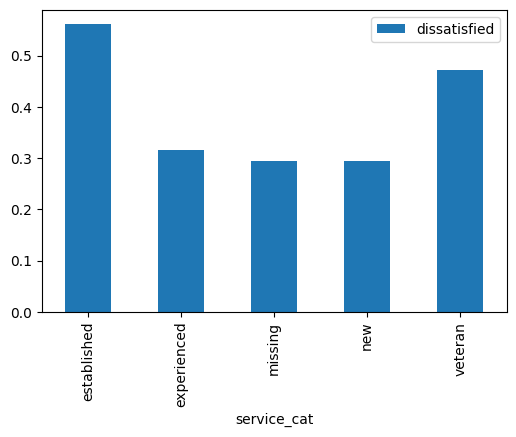

In [22]:
# confirm number of T/F values in dissatisfied column
print(combined_updated['dissatisfied'].value_counts(dropna = False))

# fill in the missing values with the value that occurs most frequently, which is False
combined_updated.loc[:, 'dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

# use pivot_table() method to caluclate percentage of dissatisfied employess in each servce category group
# and plot the results
%matplotlib inline

combined_updated.pivot_table(values = 'dissatisfied',
                             index = 'service_cat').plot(kind = 'bar')

The analysis indicates that more veteran and established employees endorse being dissatisfied with their job compared to new and experienced employees.

It may be the more years on the job as allotted them more perspective on the company's shortcomings, whereas newer employees are just happy to have a job.